In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

## Prepare SHAP data

In [2]:
# Read and prep data

# Assets
shap_assets_train = pd.read_csv('output/shap/assets_train_shap.csv')
shap_assets_test = pd.read_csv('output/shap/assets_test_shap.csv')
shap_assets_train["Set"] = "Train"
shap_assets_test["Set"] = "Test"
shap_assets = pd.concat([shap_assets_train, shap_assets_test], ignore_index=True, sort=False)
del(shap_assets_train, shap_assets_test)

# Expenditure
shap_exp_train = pd.read_csv('output/shap/exp_train_shap.csv')
shap_exp_test = pd.read_csv('output/shap/exp_test_shap.csv')
shap_exp_train["Set"] = "Train"
shap_exp_test["Set"] = "Test"
shap_exp = pd.concat([shap_exp_train, shap_exp_test], ignore_index=True, sort=False)
del(shap_exp_train, shap_exp_test)

# Income
shap_inc_train = pd.read_csv('output/shap/inc_train_shap.csv')
shap_inc_test = pd.read_csv('output/shap/inc_test_shap.csv')
shap_inc_train["Set"] = "Train"
shap_inc_test["Set"] = "Test"
shap_inc = pd.concat([shap_inc_train, shap_inc_test], ignore_index=True, sort=False)
del(shap_inc_train, shap_inc_test)

# Merge all
shap_assets['Measure'] = "Assets"
shap_exp['Measure'] = "Expenditure"
shap_inc['Measure'] = "Income"
shap_all  = pd.concat([shap_assets, shap_exp, shap_inc], ignore_index=True, sort=False)
del(shap_assets, shap_exp, shap_inc)

# Readable names
photonames = ['household',
              'Roof', 'Floor', 'Light source', 'Front door', 'Wall', 'Kitchen', 
              'Stove', 'Bathroom', 'Latrine', 'Street view', 'Water source',
              'Satellite 25m', 'Satellite 100m',
              'Set', 'Measure']
shap_all.columns = photonames

## Variable importance plot

In [3]:
# Assets
varimp_assets = shap_all.loc[shap_all['Measure']=='Assets']
varimp_assets_order = pd.melt(varimp_assets.loc[varimp_assets['Set']=='Train'], id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_assets_order['value'] = abs(varimp_assets_order['value'])
varimp_assets_order = varimp_assets_order.groupby(by=['Set', 'Measure', 'Image'], as_index=False).agg({'value': 'median'})
varimp_assets_order = list(varimp_assets_order.sort_values('value', ascending = False)['Image'])
varimp_assets = pd.melt(varimp_assets, id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_assets['shapabs'] = abs(varimp_assets['value'])
varimp_assets['Image'] = pd.Categorical(varimp_assets['Image'], categories = varimp_assets_order)

# Expenditure
varimp_exp = shap_all.loc[shap_all['Measure']=='Expenditure']
varimp_exp_order = pd.melt(varimp_exp.loc[varimp_exp['Set']=='Train'], id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_exp_order['value'] = abs(varimp_exp_order['value'])
varimp_exp_order = varimp_exp_order.groupby(by=['Set', 'Measure', 'Image'], as_index=False).agg({'value': 'median'})
varimp_exp_order = list(varimp_exp_order.sort_values('value', ascending = False)['Image'])
varimp_exp = pd.melt(varimp_exp, id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_exp['shapabs'] = abs(varimp_exp['value'])
varimp_exp['Image'] = pd.Categorical(varimp_exp['Image'], categories = varimp_exp_order)

# Income
varimp_inc = shap_all.loc[shap_all['Measure']=='Income']
varimp_inc_order = pd.melt(varimp_inc.loc[varimp_inc['Set']=='Train'], id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_inc_order['value'] = abs(varimp_inc_order['value'])
varimp_inc_order = varimp_inc_order.groupby(by=['Set', 'Measure', 'Image'], as_index=False).agg({'value': 'median'})
varimp_inc_order = list(varimp_inc_order.sort_values('value', ascending = False)['Image'])
varimp_inc = pd.melt(varimp_inc, id_vars = ['household', 'Set', 'Measure'], var_name='Image')
varimp_inc['shapabs'] = abs(varimp_inc['value'])
varimp_inc['Image'] = pd.Categorical(varimp_inc['Image'], categories = varimp_inc_order)

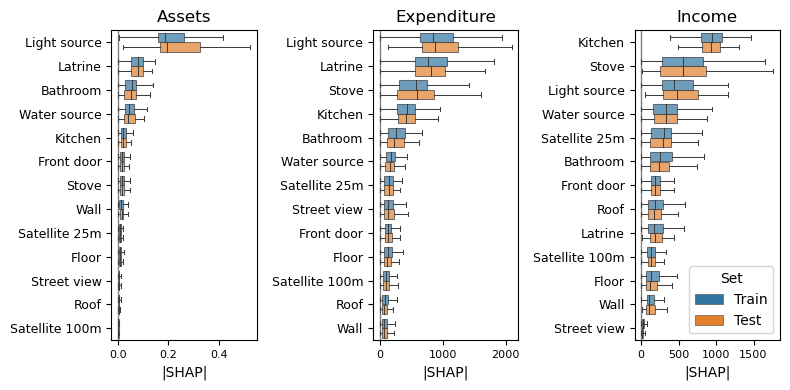

In [4]:
# Plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(8, 4))
fig.set_tight_layout(True) 

# Assets
axes[0].axvline(0, c='grey', linewidth=1)
sns.boxplot(ax=axes[0], x='shapabs', y='Image', hue='Set', boxprops=dict(alpha=.7), 
            fliersize=.2, linewidth=0.75, data=varimp_assets,showfliers=False)
axes[0].tick_params(labelsize=8)
axes[0].set(title='Assets')
axes[0].set(ylabel='') 
axes[0].set(xlabel='|SHAP|') 
axes[0].get_legend().remove()
axes[0].tick_params(axis='y', labelsize=9)

# Expenditure
axes[1].axvline(0, c='grey', linewidth=1)
sns.boxplot(ax=axes[1], x='shapabs', y='Image', hue='Set', boxprops=dict(alpha=.7), 
            fliersize=.2, linewidth=0.75, data=varimp_exp, showfliers=False)
axes[1].tick_params(labelsize=8)
axes[1].set(title='Expenditure')
axes[1].set(ylabel='') 
axes[1].set(xlabel='|SHAP|') 
axes[1].tick_params(axis='y', labelsize=9)
axes[1].get_legend().remove()

# Income
axes[2].axvline(0, c='grey', linewidth=1)
sns.boxplot(ax=axes[2], x='shapabs', y='Image', hue='Set', boxprops=dict(alpha=.7), 
            fliersize=.2, linewidth=0.75, data=varimp_inc, showfliers=False)
axes[2].tick_params(labelsize=8)
axes[2].set(title='Income')
axes[2].set(ylabel='') 
axes[2].set(xlabel='|SHAP|') 
axes[2].tick_params(axis='y', labelsize=9)

plt.show()

In [5]:
# Write to disk
fig.savefig("figures/shap_varimp.png", dpi=300) 

In [6]:
del(fig, axes,
   varimp_assets, varimp_assets_order,
   varimp_exp, varimp_exp_order,
   varimp_inc, varimp_inc_order)

## Images with the highest contributions

### Front door

In [7]:
# shap_it = shap_all[['household', 'Front door', 'Measure']]
# shap_it = shap_it.pivot(index='household', columns='Measure', values='Front door').reset_index()
# 
# # Get top and bottom 5 SHAP contributions across SEP measures
# shap_it['Assets_rank'] = shap_it['Assets'].rank()
# shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
# shap_it['Income_rank'] = shap_it['Income'].rank()
# shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
# shap_it = shap_it.sort_values('avg_rank', ascending=False)
# shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
# shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]
# 
# # Link photograph paths
# photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto4']]
# shap_it = pd.merge(shap_it, photopaths, on = 'household')
# 
# # Generate nice labels for figure
# shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
# shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
# shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
# shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
# shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
# shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']
# 
# fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
# for i in range(2):
#     for j in range(5):
#         
#         path = shap_it.loc[5*i+j, 'foto4']
# 
#         if j==0:
#             axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
#                               '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
#         else:
#             axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
#                               '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\n' + shap_it.loc[5*i+j, 'Income'])        
#         
#         img = PIL.Image.open(path)
#         img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
#         axs[i,j].axis('off')
#         axs[i,j].imshow(img)
# plt.show()

In [8]:
# fig.savefig('figures/shap_frontdoor.png', dpi=125)
# del(shap_it)

### Wall

In [9]:
# shap_it = shap_all[['household', 'Wall', 'Measure']]
# shap_it = shap_it.pivot(index='household', columns='Measure', values='Wall').reset_index()
# 
# # Get top and bottom 5 SHAP contributions across SEP measures
# shap_it['Assets_rank'] = shap_it['Assets'].rank()
# shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
# shap_it['Income_rank'] = shap_it['Income'].rank()
# shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
# shap_it = shap_it.sort_values('avg_rank', ascending=False)
# shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
# shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]
# 
# # Link photograph paths
# photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto5']]
# shap_it = pd.merge(shap_it, photopaths, on = 'household')
# 
# # Generate nice labels for figure
# shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
# shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
# shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
# shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
# shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
# shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']
# 
# fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
# for i in range(2):
#     for j in range(5):
#         
#         path = shap_it.loc[5*i+j, 'foto5']
# 
#         if j==0:
#             axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
#                               '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
#         else:
#             axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
#                               '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\n' + shap_it.loc[5*i+j, 'Income'])        
#         
#         img = PIL.Image.open(path)
#         img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
#         axs[i,j].axis('off')
#         axs[i,j].imshow(img)
# plt.show()

In [10]:
# fig.savefig('figures/shap_wall.png', dpi=125)
# del(shap_it)

### Street view

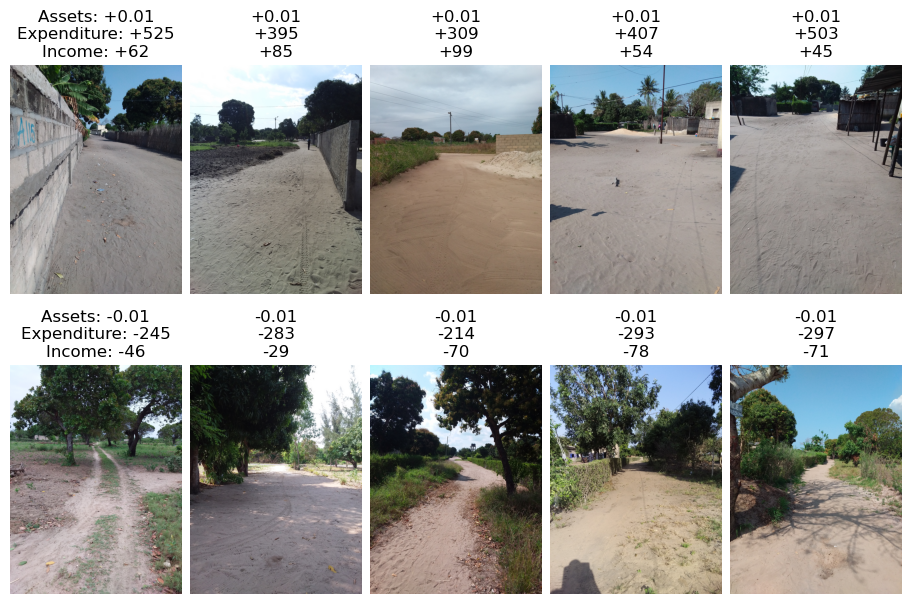

In [11]:
shap_it = shap_all[['household', 'Street view', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Street view').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto10']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto10']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [12]:
fig.savefig('figures/shap_streetview.png', dpi=125)
del(shap_it)

### Roof

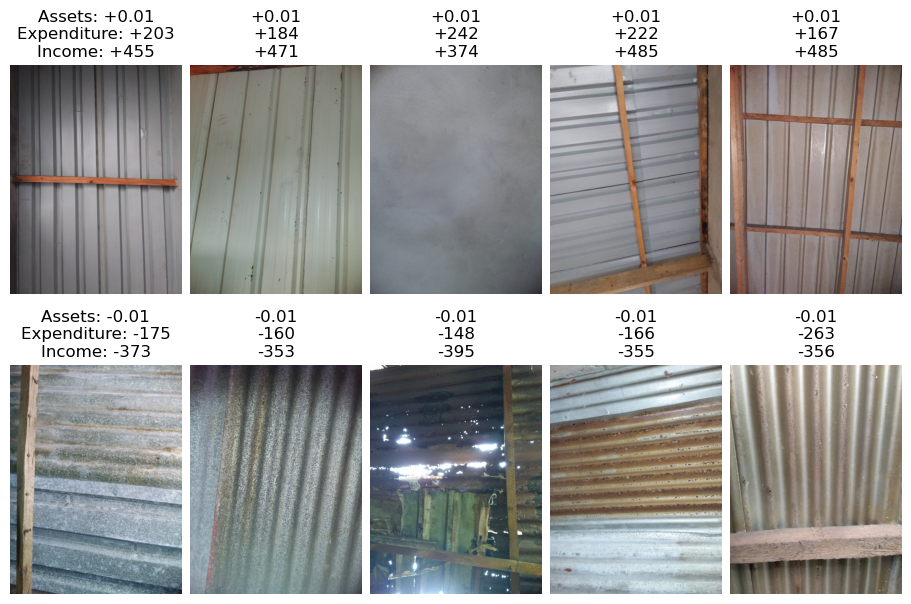

In [13]:
shap_it = shap_all[['household', 'Roof', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Roof').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto1']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto1']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [14]:
fig.savefig('figures/shap_roof.png', dpi=125)
del(shap_it)

### Floor

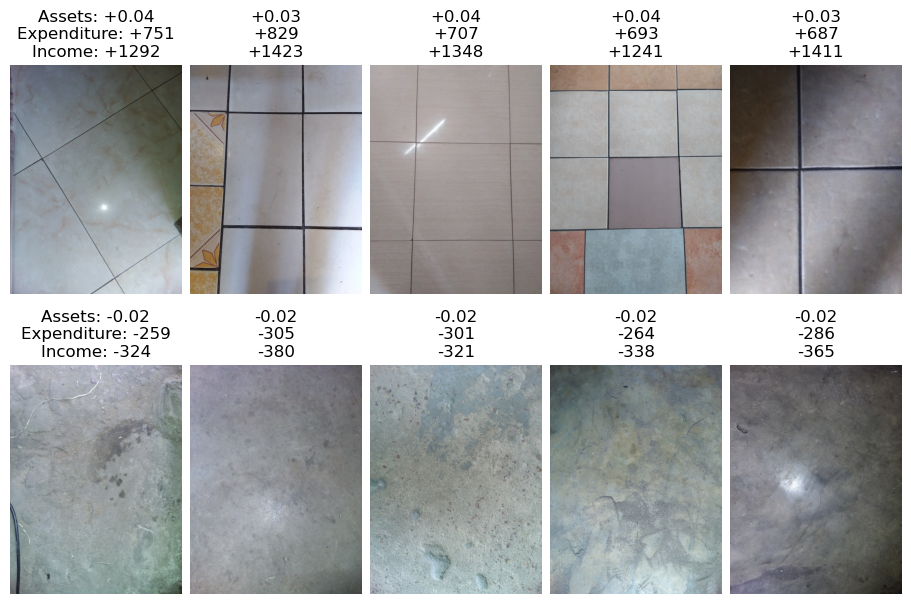

In [15]:
shap_it = shap_all[['household', 'Floor', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Floor').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto2']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto2']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [16]:
fig.savefig('figures/shap_floor.png', dpi=125)
del(shap_it)

### Light source 

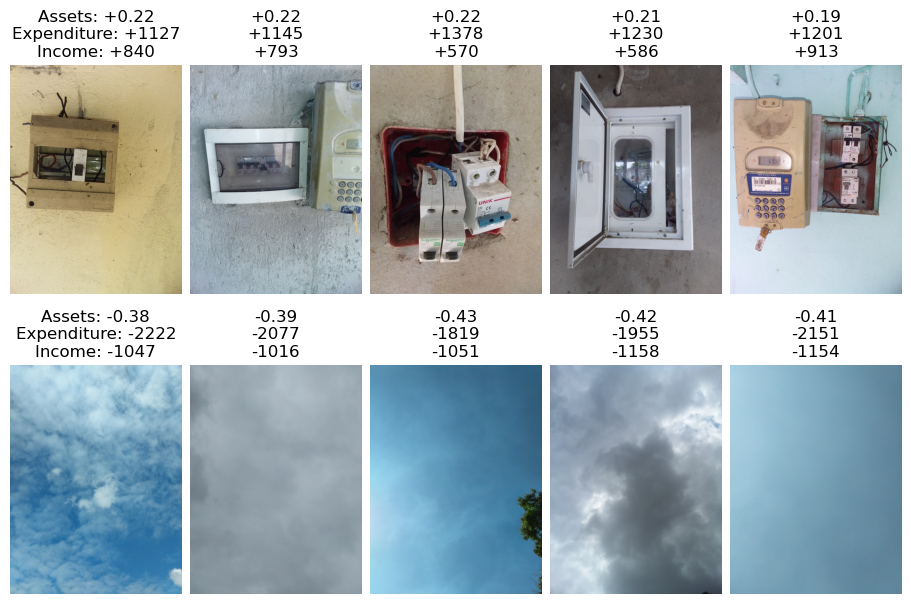

In [17]:
shap_it = shap_all[['household', 'Light source', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Light source').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto3']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto3']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [18]:
fig.savefig('figures/shap_lightsource.png', dpi=125)
del(shap_it)

### Kitchen

In [19]:
# shap_it = shap_all[['household', 'Kitchen', 'Measure']]
# shap_it = shap_it.pivot(index='household', columns='Measure', values='Kitchen').reset_index()
# 
# # Get top and bottom 5 SHAP contributions across SEP measures
# shap_it['Assets_rank'] = shap_it['Assets'].rank()
# shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
# shap_it['Income_rank'] = shap_it['Income'].rank()
# shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
# shap_it = shap_it.sort_values('avg_rank', ascending=False)
# shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
# shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]
# 
# # Link photograph paths
# photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto6']]
# shap_it = pd.merge(shap_it, photopaths, on = 'household')
# 
# # Generate nice labels for figure
# shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
# shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
# shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
# shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
# shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
# shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']
# 
# fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
# for i in range(2):
#     for j in range(5):
#         
#         path = shap_it.loc[5*i+j, 'foto6']
# 
#         if j==0:
#             axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
#                               '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
#         else:
#             axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
#                               '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\n' + shap_it.loc[5*i+j, 'Income'])        
#         
#         img = PIL.Image.open(path)
#         img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
#         axs[i,j].axis('off')
#         axs[i,j].imshow(img)
# plt.show()

In [20]:
# fig.savefig('figures/shap_kitchen.png', dpi=125)
# del(shap_it)

### Stove

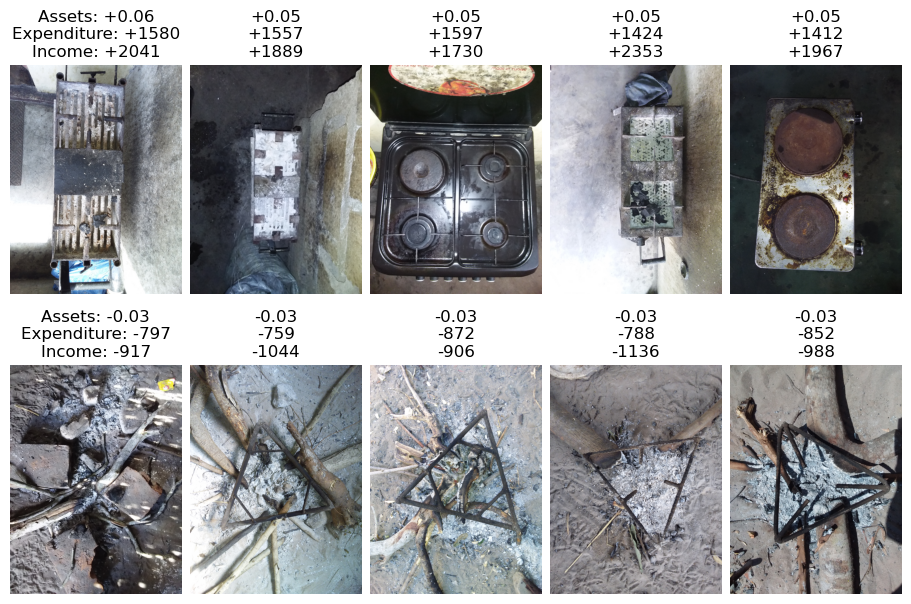

In [21]:
shap_it = shap_all[['household', 'Stove', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Stove').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto7']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto7']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [22]:
fig.savefig('figures/shap_stove.png', dpi=125)
del(shap_it)

### Bathroom

In [23]:
# shap_it = shap_all[['household', 'Bathroom', 'Measure']]
# shap_it = shap_it.pivot(index='household', columns='Measure', values='Bathroom').reset_index()
# 
# # Get top and bottom 5 SHAP contributions across SEP measures
# shap_it['Assets_rank'] = shap_it['Assets'].rank()
# shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
# shap_it['Income_rank'] = shap_it['Income'].rank()
# shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
# shap_it = shap_it.sort_values('avg_rank', ascending=False)
# shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
# shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]
# 
# # Link photograph paths
# photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto8']]
# shap_it = pd.merge(shap_it, photopaths, on = 'household')
# 
# # Generate nice labels for figure
# shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
# shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
# shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
# shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
# shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
# shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']
# 
# fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
# for i in range(2):
#     for j in range(5):
#         
#         path = shap_it.loc[5*i+j, 'foto8']
# 
#         if j==0:
#             axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
#                               '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
#         else:
#             axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
#                               '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
#                               '\n' + shap_it.loc[5*i+j, 'Income'])        
#         
#         img = PIL.Image.open(path)
#         img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
#         axs[i,j].axis('off')
#         axs[i,j].imshow(img)
# plt.show()

In [24]:
# fig.savefig('figures/shap_bathroom.png', dpi=125)
# del(shap_it)

### Latrine

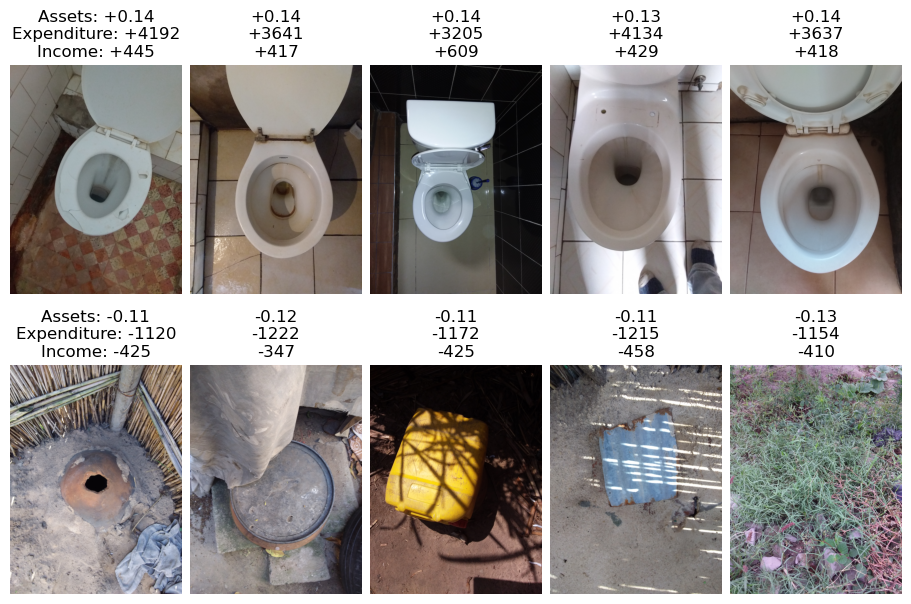

In [25]:
shap_it = shap_all[['household', 'Latrine', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Latrine').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto9']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto9']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [26]:
fig.savefig('figures/shap_latrine.png', dpi=125)
del(shap_it)

### Water source

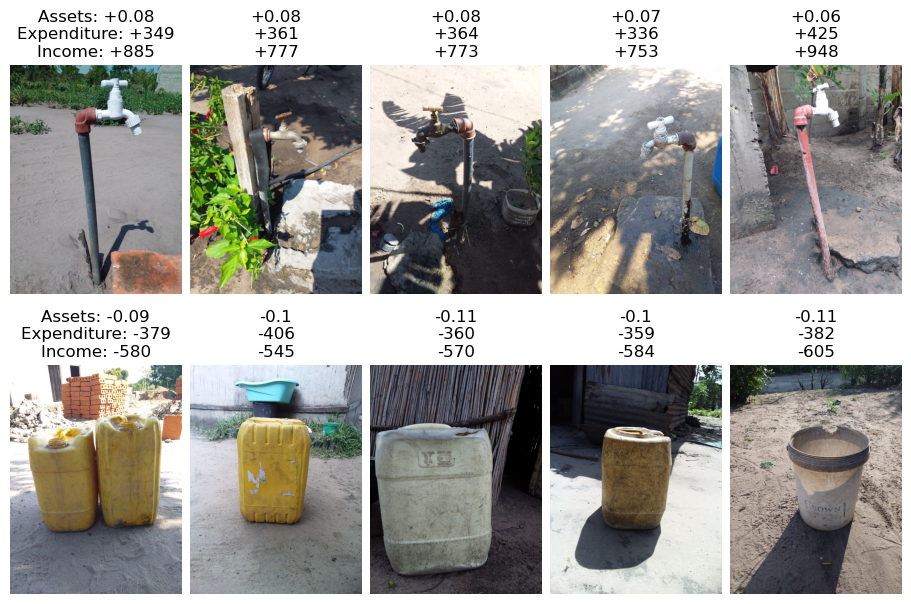

In [27]:
shap_it = shap_all[['household', 'Water source', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Water source').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'foto11']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'foto11']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [28]:
fig.savefig('figures/shap_watersource.png', dpi=125)
del(shap_it)

### Satellite 25m

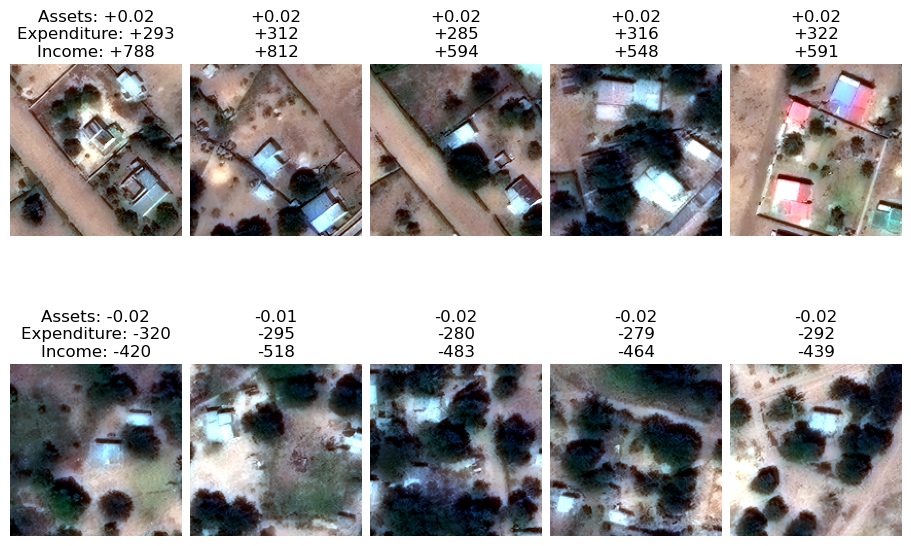

In [29]:
shap_it = shap_all[['household', 'Satellite 25m', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Satellite 25m').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'satellite25']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'satellite25']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [30]:
fig.savefig('figures/shap_satellite25m.png', dpi=125)
del(shap_it)

### Satellite 100m

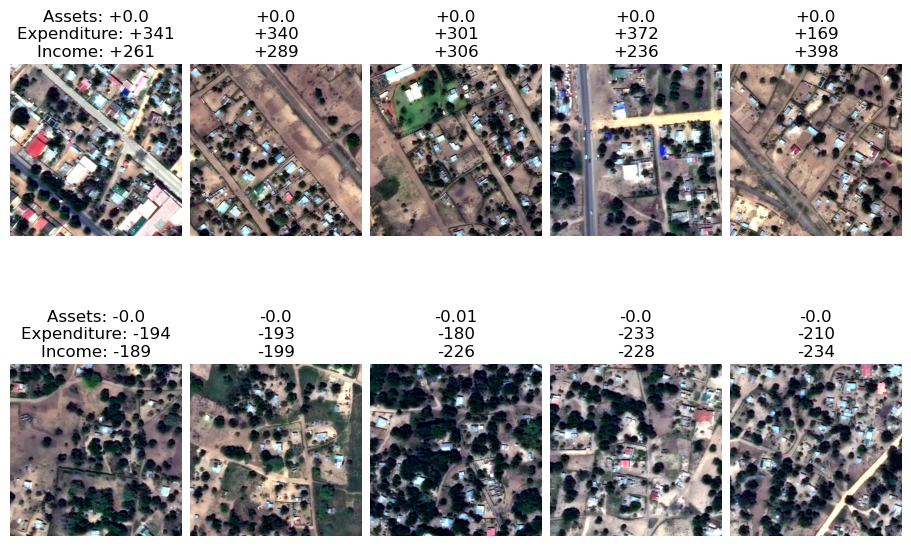

In [31]:
shap_it = shap_all[['household', 'Satellite 100m', 'Measure']]
shap_it = shap_it.pivot(index='household', columns='Measure', values='Satellite 100m').reset_index()

# Get top and bottom 5 SHAP contributions across SEP measures
shap_it['Assets_rank'] = shap_it['Assets'].rank()
shap_it['Expenditure_rank'] = shap_it['Expenditure'].rank()
shap_it['Income_rank'] = shap_it['Income'].rank()
shap_it['avg_rank'] = (shap_it['Assets_rank'] + shap_it['Expenditure_rank'] + shap_it['Income_rank']) /3
shap_it = shap_it.sort_values('avg_rank', ascending=False)
shap_it = pd.concat([shap_it.head(5), shap_it.tail(5)])
shap_it = shap_it[['household', 'Assets', 'Expenditure', 'Income']]

# Link photograph paths
photopaths = pd.read_csv("data/clean/quest_clean.csv")[['household', 'satellite100']]
shap_it = pd.merge(shap_it, photopaths, on = 'household')

# Generate nice labels for figure
shap_it['Assets'] = round(shap_it['Assets'], 2).astype(str)
shap_it['Expenditure'] = round(shap_it['Expenditure']).astype(int).astype(str)
shap_it['Income'] = round(shap_it['Income']).astype(int).astype(str)
shap_it.loc[0:4, 'Assets'] = '+' + shap_it.loc[0:4, 'Assets']
shap_it.loc[0:4, 'Expenditure'] = '+' + shap_it.loc[0:4, 'Expenditure']
shap_it.loc[0:4, 'Income'] = '+' + shap_it.loc[0:4, 'Income']

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(9,  6))
for i in range(2):
    for j in range(5):
        
        path = shap_it.loc[5*i+j, 'satellite100']

        if j==0:
            axs[i,j].set_title('Assets: ' + shap_it.loc[5*i+j, 'Assets'] +
                              '\nExpenditure: ' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\nIncome: ' + shap_it.loc[5*i+j, 'Income'])
        else:
            axs[i,j].set_title(shap_it.loc[5*i+j, 'Assets'] +
                              '\n' + shap_it.loc[5*i+j, 'Expenditure'] +
                              '\n' + shap_it.loc[5*i+j, 'Income'])        
        
        img = PIL.Image.open(path)
        img = img.rotate(-90, PIL.Image.NEAREST, expand = 1)
        axs[i,j].axis('off')
        axs[i,j].imshow(img)
plt.show()

In [32]:
fig.savefig('figures/shap_satellite100m.png', dpi=125)
del(shap_it)